# Experiments

####  Required Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing an ipynb file from another ipynb file
!pip install ipynb

In [3]:
# Importing functions from another jupyter notebook
!pip install nbimporter

In [4]:
%run GlobalConfig.ipynb

Setting global variables...


In [5]:
import nbimporter
import loader_nb
import model_selection_helper_nb

loader = loader_nb.UrlDatasetLoader()

init Loader notebook


In [6]:
help(loader.load_data)

Help on method load_data in module loader_nb:

load_data(url='https://raw.githubusercontent.com/quickheaven/scs-3253-machine-learning/master/datasets/ISCX-URL2016_All.csv') method of loader_nb.UrlDatasetLoader instance
    (string) --> dataframe
    
    This function returns the dataframe of maliciours url.    
    
    Parameters
    ----------
    url: By default, it fetch the data from github otherwise a local path or url can be provided so the data can be loaded faster.



In [7]:
help(loader.prepare_data)

Help on method prepare_data in module loader_nb:

prepare_data(data, fill_na=True, feature_selection=True) method of loader_nb.UrlDatasetLoader instance
    (DataFrame, boolean, boolean) --> X and y of the dataframe.
    
    This function returns the X and y of the malicious url dataframe.
    
    Parameters
    ----------
    fill_na : True to fill the na records with mean values otherwise drop the features.
    
    feature_selection : True to remove one or more features that have a correlation higher than 0.9 othewise do not perform that type of feature selection.
                        https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf



#### Experiment: Shows how fill_na and feature_selection affects the shapes of the dataframe.

In [8]:
df = loader.load_data(url=DATASET_LOCAL_PATH)

In [9]:
X, y = loader.prepare_data(df, fill_na=True, feature_selection=True) # default
print(X.shape)
print(y.shape)

(36707, 51)
(36707,)


In [10]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=True, feature_selection=False)
print(X.shape)
print(y.shape)

(36707, 78)
(36707,)


In [11]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=False, feature_selection=True)
print(X.shape)
print(y.shape)

(18982, 49)
(18982,)


In [ ]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=False, feature_selection=False)
print(X.shape)
print(y.shape)

#### Experiment: Combinations of data cleaning (fill_na / dropna), feature selection and unsupervised anomaly detection

In [12]:
df = loader.load_data(DATASET_LOCAL_PATH)

In [13]:
%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def train_and_tune_models( data, fill_na=True, feature_selection=True, anomaly_detection=True):
    print('train_and_tune_models fill_na:', str(fill_na), 'feature_selection:', str(feature_selection), 'anomaly_detection:' + str(anomaly_detection))
    
    X, y = loader.prepare_data(data.copy(), fill_na=fill_na, feature_selection=feature_selection)
    
    from sklearn.model_selection import train_test_split    

    X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, anomaly_detection=anomaly_detection)
    
    models_to_train = loader.get_models_to_train()
    parameters_to_train = loader.get_parameters_to_train(True)
    
    model_selection_helper = model_selection_helper_nb.ModelSelectionHelper(models_to_train, parameters_to_train)
    
    model_selection_helper.fit(X_train, y_train, cv=3, scoring='accuracy', verbose=2)
    
    data = [];
    for key in models_to_train.keys():
    
        model = model_selection_helper.get_model_best_estimator(key)

        model.fit(X_test, y_test)

        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)

        f1 = f1_score(y_test, y_pred, average='weighted')

        #print('Classification Report:', key)
        #print(classification_report(y_test, y_pred))

        data.append([key, acc, f1])
        
    df_test = pd.DataFrame(data, columns=['Model', 'Accuracy', 'F1-score'])
    df_test = df_test.sort_values(by='Accuracy', ascending=False)
    
    print(df_test)    

Wall time: 0 ns


#### Parameters: fill_na=True, feature_selection=True, anomaly_detection=True

In [14]:
%%time
# TRUE TRUE TRUE
train_and_tune_models(df, fill_na=True, feature_selection=True, anomaly_detection=True)

train_and_tune_models fill_na: True feature_selection: True anomaly_detection:True
The X_train, y_train shape:
(25694, 51)
(25694,)
The shape after unsupervised anomaly detection:
(25437, 51)
(25437,)
The X_test, y_test shape:
(11013, 51)
(11013,)
The shape after unsupervised anomaly detection:
(10902, 51)
(10902,)
init model selection helper notebook
---------------------------------------------------------------------------
RandomForestClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
best_score_:  0.9347407320045603
---------------------------------------------------------------------------
DecisionTreeClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
best_score_:  0.8888626803475254
-----------------------------------

#### Parameters: fill_na=True, feature_selection=True, anomaly_detection=False

In [16]:
%%time
# TRUE TRUE FALSE
train_and_tune_models(df, fill_na=True, feature_selection=True, anomaly_detection=False)

train_and_tune_models fill_na: True feature_selection: True anomaly_detection:False
The X_train, y_train shape:
(25694, 51)
(25694,)
The X_test, y_test shape:
(11013, 51)
(11013,)
init model selection helper notebook
---------------------------------------------------------------------------
RandomForestClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
best_score_:  0.9346929439126156
---------------------------------------------------------------------------
DecisionTreeClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
best_score_:  0.8911807655627547
---------------------------------------------------------------------------
LogisticRegression
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'C

#### Parameters: fill_na=True, feature_selection=False, anomaly_detection=True

In [18]:
%%time
# TRUE FALSE FALSE
train_and_tune_models(df, fill_na=True, feature_selection=False, anomaly_detection=False)

train_and_tune_models fill_na: True feature_selection: False anomaly_detection:False
The X_train, y_train shape:
(25694, 78)
(25694,)
The X_test, y_test shape:
(11013, 78)
(11013,)
init model selection helper notebook
---------------------------------------------------------------------------
RandomForestClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
best_score_:  0.9311123399116882
---------------------------------------------------------------------------
DecisionTreeClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
best_score_:  0.8972518765793428
---------------------------------------------------------------------------
LogisticRegression
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'

#### Parameters: fill_na=False, feature_selection=False, anomaly_detection=False

In [20]:
%%time
# FALSE FALSE FALSE
train_and_tune_models(df, fill_na=False, feature_selection=False, anomaly_detection=False)

train_and_tune_models fill_na: False feature_selection: False anomaly_detection:False
The X_train, y_train shape:
(13287, 78)
(13287,)
The X_test, y_test shape:
(5695, 78)
(5695,)
init model selection helper notebook
---------------------------------------------------------------------------
RandomForestClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
best_score_:  0.9371566192519003
---------------------------------------------------------------------------
DecisionTreeClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
best_score_:  0.9071272672537066
---------------------------------------------------------------------------
LogisticRegression
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'C

#### Parameters: fill_na=False, feature_selection=True, anomaly_detection=True

In [22]:
%%time
# FALSE TRUE TRUE
train_and_tune_models(df, fill_na=False, feature_selection=True, anomaly_detection=True)

train_and_tune_models fill_na: False feature_selection: True anomaly_detection:True
The X_train, y_train shape:
(13287, 49)
(13287,)
The shape after unsupervised anomaly detection:
(13155, 49)
(13155,)
The X_test, y_test shape:
(5695, 49)
(5695,)
The shape after unsupervised anomaly detection:
(5638, 49)
(5638,)
init model selection helper notebook
---------------------------------------------------------------------------
RandomForestClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
best_score_:  0.9341695172938046
---------------------------------------------------------------------------
DecisionTreeClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
best_score_:  0.8932725199543899
--------------------------------------

#### Parameters: fill_na=False, feature_selection=False, anomaly_detection=True

In [24]:
%%time
# FALSE FALSE TRUE
train_and_tune_models(df, fill_na=False, feature_selection=False, anomaly_detection=True)

train_and_tune_models fill_na: False feature_selection: False anomaly_detection:True
The X_train, y_train shape:
(13287, 78)
(13287,)
The shape after unsupervised anomaly detection:
(13154, 78)
(13154,)
The X_test, y_test shape:
(5695, 78)
(5695,)
The shape after unsupervised anomaly detection:
(5638, 78)
(5638,)
init model selection helper notebook
---------------------------------------------------------------------------
RandomForestClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
best_score_:  0.9334806850937865
---------------------------------------------------------------------------
DecisionTreeClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
best_score_:  0.9056560153087695
-------------------------------------

#### Isolation Forest
The data is pretty already clean hence there is only a small amount of outliers. Because of that I will simply use contamination=0.2

In [25]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df)

X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The X_train, y_train shape:
(25694, 51)
(25694,)
The shape after unsupervised anomaly detection:
(25437, 51)
(25437,)
The X_test, y_test shape:
(11013, 51)
(11013,)
The shape after unsupervised anomaly detection:
(10902, 51)
(10902,)


In [26]:
%%time
#https://medium.com/analytics-vidhya/anomaly-detection-using-isolation-forest-algorithm-8cf36c38d6f7
#https://practicaldatascience.co.uk/machine-learning/how-to-use-the-isolation-forest-model-for-outlier-detection
#https://medium.com/@y.s.yoon/isolation-forest-anomaly-detection-identify-outliers-101123a9ff63
'''
from sklearn import model_selection

model = IsolationForest(random_state=RANDOM_STATE)

param_grid = {
              #'n_estimators': [1000, 1500], 
              #'max_samples': [10], 
              #'contamination': ['auto', 0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20], 
              'contamination': [0.04, 0.05, 0.10, 0.20], 
              #'max_features': [10, 15], 
              #'bootstrap': [True], 
              #'n_jobs': [-1]
            }

grid_search = model_selection.GridSearchCV(model, 
                                           param_grid,
                                           scoring="neg_mean_squared_error", 
                                           refit=True,
                                           cv=5, 
                                           return_train_score=True,
                                           verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.fit(X_train, y_train)

print('Optimum parameters', best_model.best_params_)

#Optimum parameters {'bootstrap': True, 'contamination': 0.0001, 'max_features': 10, 'max_samples': 10, 'n_estimators': 1500, 'n_jobs': -1}
#Wall time: 1h 2min 32s
'''

Wall time: 0 ns


'\nfrom sklearn import model_selection\n\nmodel = IsolationForest(random_state=RANDOM_STATE)\n\nparam_grid = {\n              #\'n_estimators\': [1000, 1500], \n              #\'max_samples\': [10], \n              #\'contamination\': [\'auto\', 0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20], \n              \'contamination\': [0.04, 0.05, 0.10, 0.20], \n              #\'max_features\': [10, 15], \n              #\'bootstrap\': [True], \n              #\'n_jobs\': [-1]\n            }\n\ngrid_search = model_selection.GridSearchCV(model, \n                                           param_grid,\n                                           scoring="neg_mean_squared_error", \n                                           refit=True,\n                                           cv=5, \n                                           return_train_score=True,\n                                           verbose=2)\ngrid_search.fit(X_train, y_train)\n\nbest_model = grid_search.fit(X_train, y_train)\n\nprint(\'

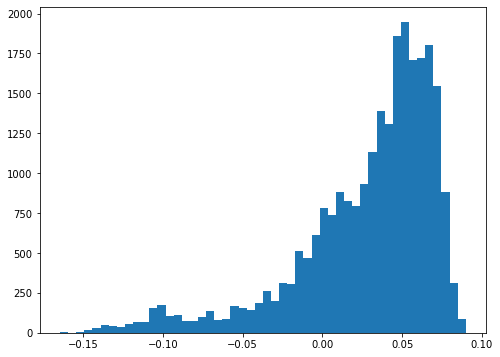

In [28]:
from sklearn.ensemble import IsolationForest
iso_Forest = IsolationForest(random_state=RANDOM_STATE, contamination=0.2)

iso_Forest.fit(X_train)

scores =  iso_Forest.decision_function(X_train)

plt.figure(figsize=(8, 6))

plt.hist(scores, bins=50);

#### Naive Bayes

In [29]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df)

X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The X_train, y_train shape:
(25694, 51)
(25694,)
The shape after unsupervised anomaly detection:
(25437, 51)
(25437,)
The X_test, y_test shape:
(11013, 51)
(11013,)
The shape after unsupervised anomaly detection:
(10902, 51)
(10902,)


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# https://www.kaggle.com/code/akshaysharma001/naive-bayes-with-hyperpameter-tuning/notebook

#models_to_train = loader.get_models_to_train()
#parameters_to_train = loader.get_parameters_to_train(is_best_params=True)

models_to_train = dict()
models_to_train['GaussianNB'] = GaussianNB()
models_to_train['MultinomialNB'] = MultinomialNB()

params_gnb = dict()
params_mnb = dict()
params_mnb['alpha']=[0.50, 1.0, 2.0] 
#params_mnb['class_prior']=[None] 
params_mnb['fit_prior']=[True, False]

parameters_to_train = dict()
parameters_to_train['GaussianNB'] = params_gnb
parameters_to_train['MultinomialNB'] = params_mnb

model_selection_helper = model_selection_helper_nb.ModelSelectionHelper(models_to_train, parameters_to_train)

init model selection helper notebook


In [31]:
%%time

model_selection_helper.fit(X_train, y_train, cv=2, scoring='accuracy', verbose=2)

---------------------------------------------------------------------------
GaussianNB
Fitting 2 folds for each of 1 candidates, totalling 2 fits
best_params_:  {}
best_score_:  0.5629200591824041
---------------------------------------------------------------------------
MultinomialNB
Fitting 2 folds for each of 6 candidates, totalling 12 fits
best_params_:  {'alpha': 1.0, 'fit_prior': False}
best_score_:  0.6267248536880898
Wall time: 779 ms


#### Gradient Boosting

In [32]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df)

X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)


The X_train, y_train shape:
(25694, 51)
(25694,)
The shape after unsupervised anomaly detection:
(25437, 51)
(25437,)
The X_test, y_test shape:
(11013, 51)
(11013,)
The shape after unsupervised anomaly detection:
(10902, 51)
(10902,)


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_clf = GradientBoostingClassifier(random_state=RANDOM_STATE)

models_to_train = dict()
models_to_train['GradientBoostingClassifier'] = gradient_boosting_clf

params_gra = dict()
#paams_gra['learning_rate'] = [0.001, 0.01, 0.1] # 0.1
#params_gra['n_estimators'] = [100, 1000]  no significant impact
#arams_gra['subsample'] = [0.5, 0.7, 1.0] # 1.0
#arams_gra['max_depth'] = [3, 7, 9] # 9
#params_gra['criterion']= ['friedman_mse']
#params_gra['max_depth']= [2, 3, 4]           # default: 3
#params_gra['max_leaf_nodes']=[10, 20, 30]   #
#params_gra['min_samples_leaf']=[1, 2, 3]    # default: 1
#params_gra['min_samples_split']=[1, 2, 3]    # default: 2     

#parameters_to_train = dict()
#parameters_to_train['GradientBoostingClassifier'] = params_gra

model_selection_helper = model_selection_helper_nb.ModelSelectionHelper(models_to_train, parameters_to_train)

init model selection helper notebook


In [34]:
%%time

# model_selection_helper.fit(X_train, y_train, cv=5, scoring='accuracy', verbose=2) # slow to run

Wall time: 0 ns
